# **Training 1st Project :**
## Flight Price Prediction

## **Done By :**
## Sondos Hosny Deraz

## **1. Importing all Libraries :**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. mount with drive to upload files :**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AI training/Data_Train.xlsx')
df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


## **3. Data analysis and visualization  :**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Date_of_Journey  10683 non-null  object 
 2   Source           10683 non-null  object 
 3   Destination      10683 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10683 non-null  object 
 6   Arrival_Time     10683 non-null  object 
 7   Duration         10683 non-null  object 
 8   Total_Stops      10682 non-null  object 
 9   Additional_Info  10683 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
np.where(pd.isnull(df['Route']))


(array([9039]),)

In [ ]:
print(df.loc[[9039]])

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info   Price  
9039  09:25 07 May  23h 40m         NaN         No info  7480.0  


In [ ]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

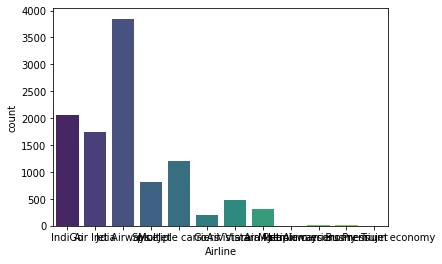

In [ ]:
sns.countplot(x='Airline', data=df ,palette='viridis')

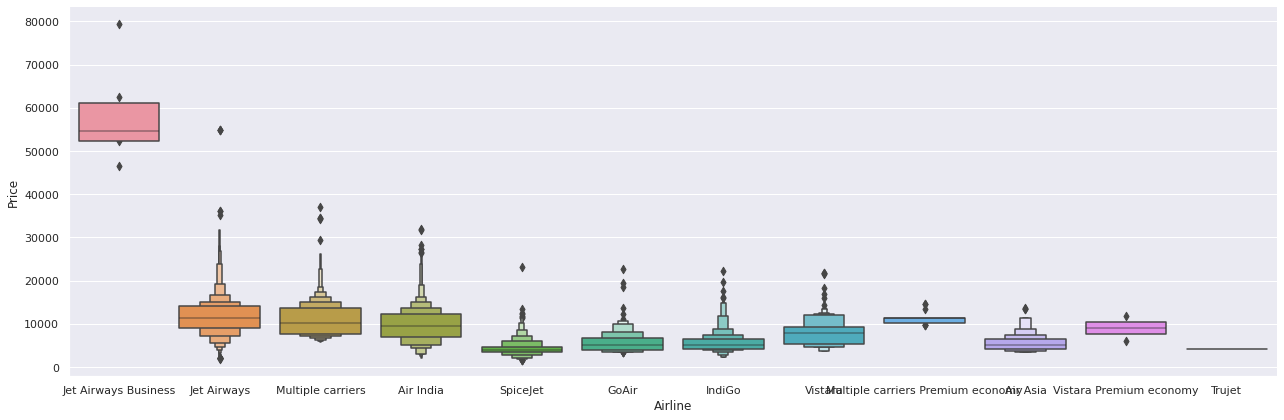

In [ ]:
sns.set()
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
'''Airline = df[['Airline']]
Airline = pd.get_dummies( Airline ,drop_first=True)
df = df.drop('Airline',axis=1)
df = pd.concat([df,Airline] ,axis=1 )'''

"Airline = df[['Airline']]\nAirline = pd.get_dummies( Airline ,drop_first=True)\ndf = df.drop('Airline',axis=1)\ndf = pd.concat([df,Airline] ,axis=1 )"

In [ ]:
df['Airline'] = df['Airline'].replace('Jet Airways', 1) \
    .replace('IndiGo', 2) \
    .replace('Air India', 3) \
    .replace('Multiple carriers', 4) \
    .replace('SpiceJet', 5) \
    .replace('Vistara', 6) \
    .replace('Air Asia', 7) \
    .replace('GoAir', 8) \
    .replace('Multiple carriers Premium economy', 9) \
    .replace('Jet Airways Business', 10) \
    .replace('Vistara Premium economy', 11) \
    .replace('Trujet', 12)

In [ ]:
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

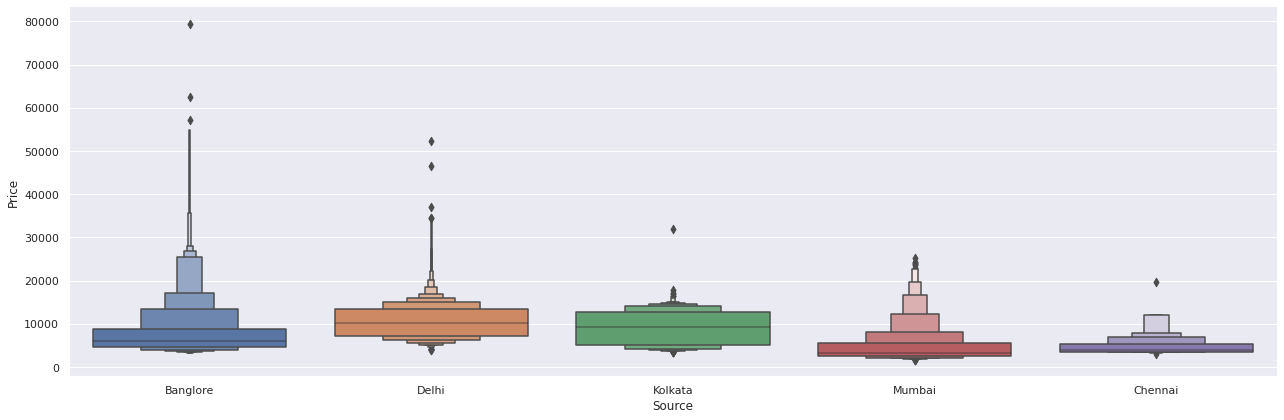

In [ ]:
sns.set()
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
Source = df[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
df = df.drop('Source',axis=1)
df = pd.concat([df,Source] ,axis=1 )

In [ ]:
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

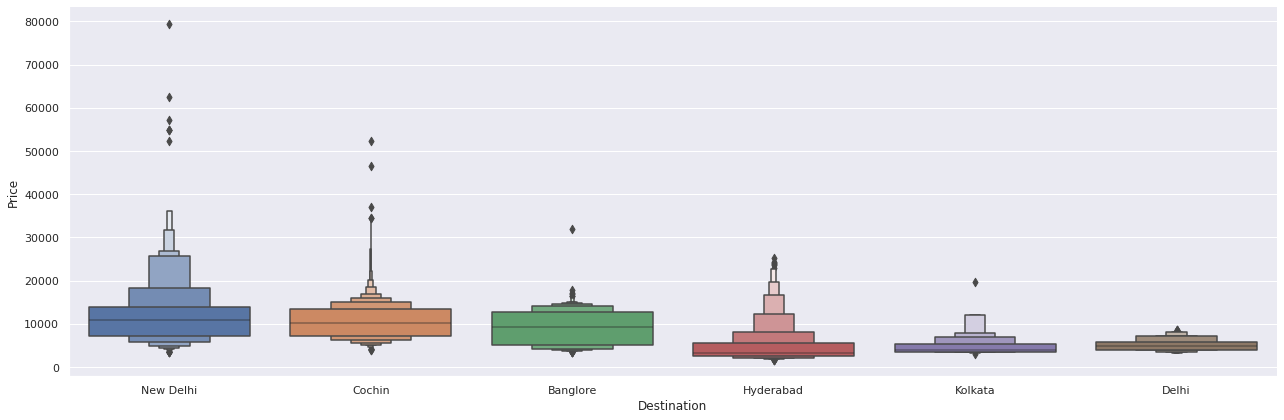

In [ ]:
sns.set()
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
df = df.drop('Destination',axis=1)
df = pd.concat([df,Destination] ,axis=1 )

In [ ]:
'''df['Source'] = df['Source'].replace('Delhi', 1) \
    .replace('Kolkata', 2) \
    .replace('Banglore', 3) \
    .replace('Mumbai', 4) \
    .replace('Chennai', 5)'''

"df['Source'] = df['Source'].replace('Delhi', 1)     .replace('Kolkata', 2)     .replace('Banglore', 3)     .replace('Mumbai', 4)     .replace('Chennai', 5)"

In [ ]:
'''df['Destination'] = df['Destination'].replace('Delhi', 1) \
    .replace('Kolkata', 2) \
    .replace('Banglore', 3) \
    .replace('Cochin', 6) \
    .replace('New Delhi', 7) \
    .replace('Hyderabad', 8)'''

"df['Destination'] = df['Destination'].replace('Delhi', 1)     .replace('Kolkata', 2)     .replace('Banglore', 3)     .replace('Cochin', 6)     .replace('New Delhi', 7)     .replace('Hyderabad', 8)"

## **4. Data Preprocessing :**

In [ ]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [ ]:
df['year']= df['Date_of_Journey'].dt.year
df['month']= df['Date_of_Journey'].dt.month
df['day']= df['Date_of_Journey'].dt.day
df.head()

,Airline,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,...,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,year,month,day
0,2,2019-03-24,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,0,...,0,0,0,0,0,0,1,2019,3,24
1,3,2019-01-05,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,0,...,1,0,0,0,0,0,0,2019,1,5
2,1,2019-09-06,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,0,...,0,0,1,0,0,0,0,2019,9,6
3,2,2019-12-05,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,0,...,1,0,0,0,0,0,0,2019,12,5
4,2,2019-01-03,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,0,...,0,0,0,0,0,0,1,2019,1,3


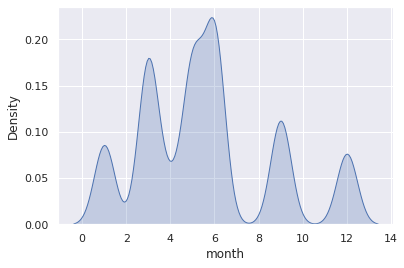

In [ ]:
sns.kdeplot(df['month'], shade = True )

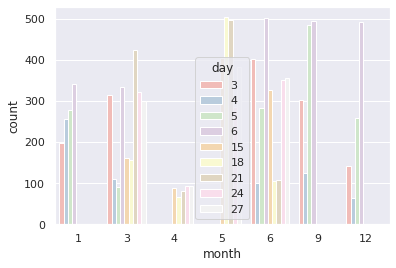

In [ ]:
sns.countplot(x='month', data=df, hue='day', palette='Pastel1')

In [ ]:
df = df.drop(['Date_of_Journey','year'],axis=1)

In [ ]:
r= df['Route'].str.count('→')
r

0        1.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
10678    1.0
10679    1.0
10680    1.0
10681    1.0
10682    3.0
Name: Route, Length: 10683, dtype: float64

In [ ]:
r-=1

In [ ]:
r

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Route, Length: 10683, dtype: float64

In [ ]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', 0) \
    .replace('1 stop', 1) \
    .replace('2 stops', 2) \
    .replace('3 stops', 3) \
    .replace('4 stops', 4)

In [ ]:
df = df.drop(['Route'],axis=1)

In [ ]:
df['Route'] = r

In [ ]:
df['Route'].equals(df['Total_Stops'])

True

In [ ]:
df = df.drop(['Route'],axis=1)

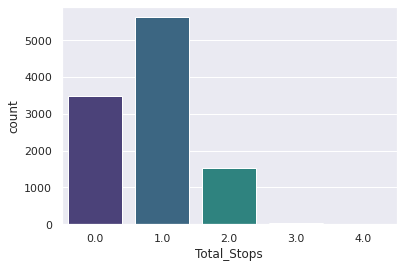

In [ ]:
sns.countplot(x='Total_Stops', data=df ,palette='viridis')

In [ ]:
t = df['Arrival_Time'].str.split(' ')

In [ ]:
t

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10683, dtype: object

In [ ]:
tt= pd.DataFrame(t.to_list())
tt

,0,1,2
0,01:10,22,Mar
1,13:15,None,None
2,04:25,10,Jun
3,23:30,None,None
4,21:35,None,None
...,...,...,...
10678,22:25,None,None
10679,23:20,None,None
10680,11:20,None,None
10681,14:10,None,None


In [ ]:
print(tt.loc[[9039]])

          0   1    2
9039  09:25  07  May


In [ ]:
tt.drop([1,2] , axis=1)

,0
0,01:10
1,13:15
2,04:25
3,23:30
4,21:35
...,...
10678,22:25
10679,23:20
10680,11:20
10681,14:10


In [ ]:
t = tt[0].str.split(':')
t

0        [01, 10]
1        [13, 15]
2        [04, 25]
3        [23, 30]
4        [21, 35]
           ...   
10678    [22, 25]
10679    [23, 20]
10680    [11, 20]
10681    [14, 10]
10682    [19, 15]
Name: 0, Length: 10683, dtype: object

In [ ]:
tt= pd.DataFrame(t.to_list())
tt

,0,1
0,01,10
1,13,15
2,04,25
3,23,30
4,21,35
...,...,...
10678,22,25
10679,23,20
10680,11,20
10681,14,10


In [ ]:
df['Arr_hour'] = tt[0]

In [ ]:
df['Arr_min'] = tt[1]

In [ ]:
df = df.drop(['Arrival_Time'],axis=1)

In [ ]:
t = df['Dep_Time'].str.split(':')
t

0        [22, 20]
1        [05, 50]
2        [09, 25]
3        [18, 05]
4        [16, 50]
           ...   
10678    [19, 55]
10679    [20, 45]
10680    [08, 20]
10681    [11, 30]
10682    [10, 55]
Name: Dep_Time, Length: 10683, dtype: object

In [ ]:
tt= pd.DataFrame(t.to_list())

In [ ]:
df['Dep_hour'] = tt[0]
df['Dep_min'] = tt[1]
df.head()

,Airline,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min
0,2,22:20,2h 50m,0.0,No info,3897.0,0,0,0,0,...,0,0,0,1,3,24,01,10,22,20
1,3,05:50,7h 25m,2.0,No info,7662.0,0,0,1,0,...,0,0,0,0,1,5,13,15,05,50
2,1,09:25,19h,2.0,No info,13882.0,0,1,0,0,...,0,0,0,0,9,6,04,25,09,25
3,2,18:05,5h 25m,1.0,No info,6218.0,0,0,1,0,...,0,0,0,0,12,5,23,30,18,05
4,2,16:50,4h 45m,1.0,No info,13302.0,0,0,0,0,...,0,0,0,1,1,3,21,35,16,50


In [ ]:
df = df.drop(['Dep_Time'],axis=1)

In [ ]:
print(df.loc[[9039]])

      Airline Duration  Total_Stops Additional_Info   Price  Source_Chennai  \
9039        3  23h 40m          NaN         No info  7480.0               0   

      Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
9039             1               0              0                   1   

      Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
9039                  0                      0                    0   

      Destination_New Delhi  month  day Arr_hour Arr_min Dep_hour Dep_min  
9039                      0      6    5       09      25       09      45  


In [ ]:
df.isnull().sum()

Airline                  0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
month                    0
day                      0
Arr_hour                 0
Arr_min                  0
Dep_hour                 0
Dep_min                  0
dtype: int64

In [ ]:
#df['Time_Diff'] = pd.to_datetime(df.Arr_time) - pd.to_datetime(df.Dep_Time)

In [ ]:
df.head(10)

,Airline,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min
0,2,2h 50m,0.0,No info,3897.0,0,0,0,0,0,0,0,0,1,3,24,01,10,22,20
1,3,7h 25m,2.0,No info,7662.0,0,0,1,0,0,0,0,0,0,1,5,13,15,05,50
2,1,19h,2.0,No info,13882.0,0,1,0,0,1,0,0,0,0,9,6,04,25,09,25
3,2,5h 25m,1.0,No info,6218.0,0,0,1,0,0,0,0,0,0,12,5,23,30,18,05
4,2,4h 45m,1.0,No info,13302.0,0,0,0,0,0,0,0,0,1,1,3,21,35,16,50
5,5,2h 25m,0.0,No info,3873.0,0,0,1,0,0,0,0,0,0,6,24,11,25,09,00
6,1,15h 30m,1.0,In-flight meal not included,11087.0,0,0,0,0,0,0,0,0,1,12,3,10,25,18,55
7,1,21h 5m,1.0,No info,22270.0,0,0,0,0,0,0,0,0,1,1,3,05,05,08,00
8,1,25h 30m,1.0,In-flight meal not included,11087.0,0,0,0,0,0,0,0,0,1,12,3,10,25,08,55
9,4,7h 50m,1.0,No info,8625.0,0,1,0,0,1,0,0,0,0,5,27,19,15,11,25


In [ ]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df['Additional_Info'] = df['Additional_Info'].replace('No info', 0) \
    .replace('In-flight meal not included', 1) \
    .replace('No check-in baggage included', 2) \
    .replace('1 Long layover', 3) \
    .replace('Change airports', 4) \
    .replace('Business class', 6) \
    .replace('No Info', 0) \
    .replace('1 Short layover', 7) \
    .replace('2 Long layover', 8) \
    .replace('Red-eye flight', 9)

In [ ]:
df['Arr_hour'] = df['Arr_hour'].astype(int)
df['Arr_min'] = df['Arr_min'].astype(int)
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)


In [ ]:
df.head()

,Airline,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min
0,2,2h 50m,0.0,0,3897.0,0,0,0,0,0,0,0,0,1,3,24,1,10,22,20
1,3,7h 25m,2.0,0,7662.0,0,0,1,0,0,0,0,0,0,1,5,13,15,5,50
2,1,19h,2.0,0,13882.0,0,1,0,0,1,0,0,0,0,9,6,4,25,9,25
3,2,5h 25m,1.0,0,6218.0,0,0,1,0,0,0,0,0,0,12,5,23,30,18,5
4,2,4h 45m,1.0,0,13302.0,0,0,0,0,0,0,0,0,1,1,3,21,35,16,50


In [ ]:
cl = df['Duration'].str.split('h ').str.join(':').map(lambda x: x.rstrip('m')).str.replace(' ', '').str.replace('h', ':00')
cl


0         2:50
1         7:25
2        19:00
3         5:25
4         4:45
         ...  
10678     2:30
10679     2:35
10680     3:00
10681     2:40
10682     8:20
Name: Duration, Length: 10683, dtype: object

In [ ]:
t = cl.str.split(':')
t

0         [2, 50]
1         [7, 25]
2        [19, 00]
3         [5, 25]
4         [4, 45]
           ...   
10678     [2, 30]
10679     [2, 35]
10680     [3, 00]
10681     [2, 40]
10682     [8, 20]
Name: Duration, Length: 10683, dtype: object

In [ ]:
tt= pd.DataFrame(t.to_list())

In [ ]:
df['Dur_hour'] = tt[0]
df['Dur_min'] = tt[1]
df.head()

,Airline,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,...,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min,Dur_hour,Dur_min
0,2,2h 50m,0.0,0,3897.0,0,0,0,0,0,...,0,1,3,24,1,10,22,20,2,50
1,3,7h 25m,2.0,0,7662.0,0,0,1,0,0,...,0,0,1,5,13,15,5,50,7,25
2,1,19h,2.0,0,13882.0,0,1,0,0,1,...,0,0,9,6,4,25,9,25,19,00
3,2,5h 25m,1.0,0,6218.0,0,0,1,0,0,...,0,0,12,5,23,30,18,5,5,25
4,2,4h 45m,1.0,0,13302.0,0,0,0,0,0,...,0,1,1,3,21,35,16,50,4,45


In [ ]:
df.isnull().sum()

Airline                  0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Source_Chennai           0
Source_Delhi             0
Source_Kolkata           0
Source_Mumbai            0
Destination_Cochin       0
Destination_Delhi        0
Destination_Hyderabad    0
Destination_Kolkata      0
Destination_New Delhi    0
month                    0
day                      0
Arr_hour                 0
Arr_min                  0
Dep_hour                 0
Dep_min                  0
Dur_hour                 0
Dur_min                  1
dtype: int64

In [ ]:
np.where(pd.isnull(df['Dur_hour']))

(array([], dtype=int64),)

In [ ]:
np.where(pd.isnull(df['Dur_min']))

(array([6474]),)

In [ ]:
print(df.loc[[6474]])

      Airline Duration  Total_Stops  Additional_Info    Price  Source_Chennai  \
6474        3       5m          2.0                0  17327.0               0   

      Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  ...  \
6474             0               0              1                   0  ...   

      Destination_Kolkata  Destination_New Delhi  month  day  Arr_hour  \
6474                    0                      0      6    3        16   

      Arr_min  Dep_hour  Dep_min  Dur_hour  Dur_min  
6474       55        16       50         5     None  

[1 rows x 22 columns]


In [ ]:
df= df.dropna(how='any' , axis=0)

In [ ]:
df['Dur_hour'] = df['Dur_hour'].astype(int)
df['Dur_min'] = df['Dur_min'].astype(int)
df['Total_Stops'] = df['Total_Stops'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


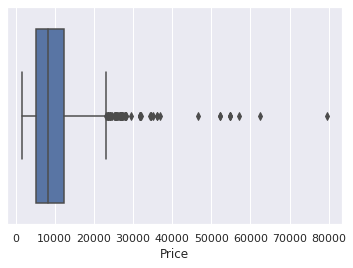

In [ ]:
sns.boxplot(df['Price'] )

In [ ]:
df

,Airline,Duration,Total_Stops,Additional_Info,Price,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,...,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min,Dur_hour,Dur_min
0,2,2h 50m,0,0,3897.0,0,0,0,0,0,...,0,1,3,24,1,10,22,20,2,50
1,3,7h 25m,2,0,7662.0,0,0,1,0,0,...,0,0,1,5,13,15,5,50,7,25
2,1,19h,2,0,13882.0,0,1,0,0,1,...,0,0,9,6,4,25,9,25,19,0
3,2,5h 25m,1,0,6218.0,0,0,1,0,0,...,0,0,12,5,23,30,18,5,5,25
4,2,4h 45m,1,0,13302.0,0,0,0,0,0,...,0,1,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2h 30m,0,0,4107.0,0,0,1,0,0,...,0,0,9,4,22,25,19,55,2,30
10679,3,2h 35m,0,0,4145.0,0,0,1,0,0,...,0,0,4,27,23,20,20,45,2,35
10680,1,3h,0,0,7229.0,0,0,0,0,0,...,0,0,4,27,11,20,8,20,3,0
10681,6,2h 40m,0,0,12648.0,0,0,0,0,0,...,0,1,1,3,14,10,11,30,2,40


## **5. Preprocessing test set :**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
            Airline Date_of_Journey Source Destination            Route  \
count          2671            2671   2671        2671             2671   
unique           11              44      5           6              100   
top     Jet Airways       9/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq 

,Airline,Total_Stops,Additional_Info,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min,Dur_hour,Dur_min
0,1,1,0,0,1,0,0,1,0,0,0,0,6,6,4,25,17,30,10,55
1,2,1,0,0,0,1,0,0,0,0,0,0,12,5,10,20,6,20,4,0
2,1,1,1,0,1,0,0,1,0,0,0,0,5,21,19,0,19,15,23,45
3,4,1,0,0,1,0,0,1,0,0,0,0,5,21,21,0,8,0,13,0
4,7,0,0,0,0,0,0,0,1,0,0,0,6,24,2,45,23,55,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,3,1,0,0,0,1,0,0,0,0,0,0,6,6,20,25,20,30,23,55
2667,2,0,0,0,0,1,0,0,0,0,0,0,3,27,16,55,14,20,2,35
2668,1,1,0,0,1,0,0,1,0,0,0,0,6,3,4,25,21,50,6,35
2669,3,1,0,0,1,0,0,1,0,0,0,0,6,3,19,15,4,0,15,15


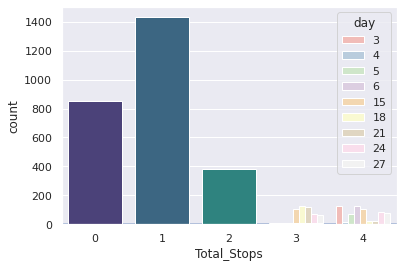

In [ ]:
dff = pd.read_excel('/content/drive/MyDrive/AI training/Test_set.xlsx')

print(dff.info())

print(dff.describe())

print(dff.isnull().sum())

print(dff.Airline.value_counts())


'''Airline = dff[['Airline']]
Airline = pd.get_dummies( Airline ,drop_first=True)
dff = dff.drop('Airline',axis=1)
dff = pd.concat([dff,Airline] ,axis=1 )'''
dff['Airline'] = dff['Airline'].replace('Jet Airways', 1) \
    .replace('IndiGo', 2) \
    .replace('Air India', 3) \
    .replace('Multiple carriers', 4) \
    .replace('SpiceJet', 5) \
    .replace('Vistara', 6) \
    .replace('Air Asia', 7) \
    .replace('GoAir', 8) \
    .replace('Multiple carriers Premium economy', 9) \
    .replace('Jet Airways Business', 10) \
    .replace('Vistara Premium economy', 11) \
    .replace('Trujet', 12)


print(dff.Source.value_counts())

Source = dff[['Source']]
Source = pd.get_dummies( Source ,drop_first=True)
dff = dff.drop('Source',axis=1)
dff = pd.concat([dff,Source] ,axis=1 )


print(dff.Destination.value_counts())


Destination = dff[['Destination']]
Destination = pd.get_dummies( Destination ,drop_first=True)
dff = dff.drop('Destination',axis=1)
dff = pd.concat([dff,Destination] ,axis=1 )


dff['Date_of_Journey'] = pd.to_datetime(dff['Date_of_Journey'])
dff['year']= dff['Date_of_Journey'].dt.year
dff['month']= dff['Date_of_Journey'].dt.month
dff['day']= dff['Date_of_Journey'].dt.day

print(sns.kdeplot(dff['month'], shade = True ))
print(sns.countplot(x='month', data=dff, hue='day', palette='Pastel1'))
dff = dff.drop(['Date_of_Journey','year'],axis=1)


r= dff['Route'].str.count('→')
r-=1
print(dff.Total_Stops.value_counts())
dff['Total_Stops'] = dff['Total_Stops'].replace('non-stop', 0) \
    .replace('1 stop', 1) \
    .replace('2 stops', 2) \
    .replace('3 stops', 3) \
    .replace('4 stops', 4)
dff = dff.drop(['Route'],axis=1)
dff['Route'] = r
print(dff['Route'].equals(dff['Total_Stops']))
dff = dff.drop(['Route'],axis=1)
print(sns.countplot(x='Total_Stops', data=dff ,palette='viridis'))


t = dff['Arrival_Time'].str.split(' ')
tt= pd.DataFrame(t.to_list())
tt.drop([1,2] , axis=1)
t = tt[0].str.split(':')
tt= pd.DataFrame(t.to_list())
dff['Arr_hour'] = tt[0]
dff['Arr_min'] = tt[1]
dff = dff.drop(['Arrival_Time'],axis=1)


t = dff['Dep_Time'].str.split(' ')
tt= pd.DataFrame(t.to_list())

t = tt[0].str.split(':')
tt= pd.DataFrame(t.to_list())
dff['Dep_hour'] = tt[0]
dff['Dep_min'] = tt[1]
dff = dff.drop(['Dep_Time'],axis=1)


dff['Additional_Info'] = dff['Additional_Info'].replace('No info', 0) \
    .replace('In-flight meal not included', 1) \
    .replace('No check-in baggage included', 2) \
    .replace('1 Long layover', 3) \
    .replace('Change airports', 4) \
    .replace('Business class', 6) \
    .replace('No Info', 0) \
    .replace('1 Short layover', 7) \
    .replace('2 Long layover', 8) \
    .replace('Red-eye flight', 9)

cl = dff['Duration'].str.split('h ').str.join(':').map(lambda x: x.rstrip('m')).str.replace(' ', '').str.replace('h', ':00')
t = cl.str.split(':')
tt= pd.DataFrame(t.to_list())
dff['Dur_hour'] = tt[0]
dff['Dur_min'] = tt[1]

dff= dff.dropna(how='any' , axis=0)



dff['Arr_hour'] = dff['Arr_hour'].astype(int)
dff['Arr_min'] = dff['Arr_min'].astype(int)
dff['Dep_hour'] = dff['Dep_hour'].astype(int)
dff['Dep_min'] = dff['Dep_min'].astype(int)
dff['Dur_hour'] = dff['Dur_hour'].astype(int)
dff['Dur_min'] = dff['Dur_min'].astype(int)
dff['Total_Stops'] = dff['Total_Stops'].astype(int)
dff = dff.drop(['Duration'],axis=1)
dff

## **6. Machine Learning :**

### **6.1 Linear Regression**

In [ ]:
x = df.drop(['Price' , 'Duration'],axis=1)
y = df['Price']

In [ ]:
dff.head()

,Airline,Total_Stops,Additional_Info,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min,Dur_hour,Dur_min
0,1,1,0,0,1,0,0,1,0,0,0,0,6,6,4,25,17,30,10,55
1,2,1,0,0,0,1,0,0,0,0,0,0,12,5,10,20,6,20,4,0
2,1,1,1,0,1,0,0,1,0,0,0,0,5,21,19,0,19,15,23,45
3,4,1,0,0,1,0,0,1,0,0,0,0,5,21,21,0,8,0,13,0
4,7,0,0,0,0,0,0,0,1,0,0,0,6,24,2,45,23,55,2,50


In [ ]:
x

,Airline,Total_Stops,Additional_Info,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min,Dur_hour,Dur_min
0,2,0,0,0,0,0,0,0,0,0,0,1,3,24,1,10,22,20,2,50
1,3,2,0,0,0,1,0,0,0,0,0,0,1,5,13,15,5,50,7,25
2,1,2,0,0,1,0,0,1,0,0,0,0,9,6,4,25,9,25,19,0
3,2,1,0,0,0,1,0,0,0,0,0,0,12,5,23,30,18,5,5,25
4,2,1,0,0,0,0,0,0,0,0,0,1,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,0,0,0,0,1,0,0,0,0,0,0,9,4,22,25,19,55,2,30
10679,3,0,0,0,0,1,0,0,0,0,0,0,4,27,23,20,20,45,2,35
10680,1,0,0,0,0,0,0,0,1,0,0,0,4,27,11,20,8,20,3,0
10681,6,0,0,0,0,0,0,0,0,0,0,1,1,3,14,10,11,30,2,40


In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 x_train = scaler.fit_transform(x_train)
 x_test = scaler.fit_transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_train)

In [ ]:
score = metrics.r2_score(y_train,y_pred)
score

0.46175486795171705

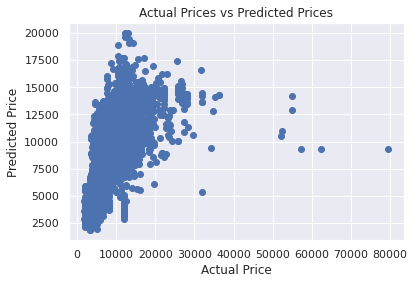

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

### **6.2 XGB Regressor :**

In [ ]:
from xgboost import XGBRegressor
model =  XGBRegressor()
model.fit(x_train,y_train)

[15:07:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_pred =  model.predict(x_test)
print('Training Score :',model.score(x_train, y_train))
print('Test Score     :',model.score(x_test, y_test))

Training Score : 0.834479685684664
Test Score     : 0.7968339675524778


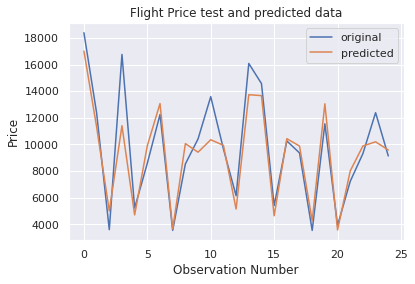

In [ ]:
number_of_observations=25

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

### **6.3 Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = reg_rf.predict(x_test)


In [ ]:
reg_rf.score(x_train, y_train)

0.980411663451216

In [ ]:
reg_rf.score(x_test, y_test)

0.8899167924478968

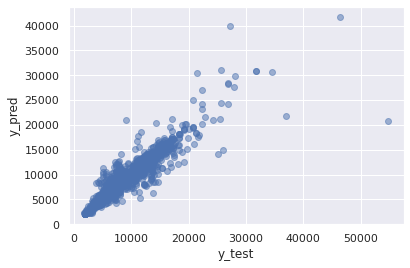

In [ ]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [ ]:
mod = joblib.load('model.h5')
scal = joblib.load('scaler.h5')

[15:08:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
data = scal.transform(dff)
price = mod.predict(data)

In [ ]:
p = pd.DataFrame(price)
p

,0
0,13458.944336
1,5201.095215
2,10964.078125
3,10257.357422
4,4312.426758
...,...
2665,9116.599609
2666,4165.043457
2667,17470.833984
2668,12705.590820


In [ ]:
dff['Price'] = p

In [ ]:
dff.head(10)

,Airline,Total_Stops,Additional_Info,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,...,Destination_New Delhi,month,day,Arr_hour,Arr_min,Dep_hour,Dep_min,Dur_hour,Dur_min,Price
0,1,1,0,0,1,0,0,1,0,0,...,0,6,6,4,25,17,30,10,55,13458.944336
1,2,1,0,0,0,1,0,0,0,0,...,0,12,5,10,20,6,20,4,0,5201.095215
2,1,1,1,0,1,0,0,1,0,0,...,0,5,21,19,0,19,15,23,45,10964.078125
3,4,1,0,0,1,0,0,1,0,0,...,0,5,21,21,0,8,0,13,0,10257.357422
4,7,0,0,0,0,0,0,0,1,0,...,0,6,24,2,45,23,55,2,50,4312.426758
5,1,1,1,0,1,0,0,1,0,0,...,0,12,6,12,35,18,15,18,20,10036.603516
6,3,1,0,0,0,0,0,0,0,0,...,1,12,3,22,35,7,30,15,5,10564.985352
7,2,1,0,0,0,1,0,0,0,0,...,0,1,5,20,30,15,15,5,15,7545.194336
8,2,0,0,0,0,1,0,0,0,0,...,0,3,15,12,55,10,10,2,45,4414.557129
9,1,1,0,0,0,1,0,0,0,0,...,0,5,18,22,35,16,30,6,5,13757.454102


In [ ]:
file_name = 'Predicted.xlsx'

In [ ]:
dff.to_excel(file_name)